# Multimodal Agentic (Self Control) RAG Chatbot


**Proje Amacı:**
Bu proje, "Artificial Intelligence with Python-334 sayfa" kitabındaki metin, tablo ve görselleri kullanarak belirli bir konu üzerinde soru-cevap etkileşimi gerçekleştirebilen bir Multimodal Agentic (Self-Control) RAG (Retrieval-Augmented Generation) chatbot geliştirmeyi amaçlamaktadır. Chatbot, kitaptaki bilgileri en doğru ve ilişkili şekilde kullanarak sorulara yanıt vermelidir. Aynı zamanda, kitap haricindeki sorulara yanıt verirken Wikipedia aracı üzerinden bilgi sağlaması öngörülmektedir.

**Proje Tanımı:**
Projenin odak noktası, kullanıcıların sorduğu sorulara kitap içeriğinden yanıt verebilecek ve gerektiğinde Wikipedia'dan ek bilgi sağlayabilecek bir chatbot oluşturmaktır. Modelin yanıt üretim süreci, aşağıdaki adımları içermektedir:

**Retriever ve Model İlişkilendirme:** Kullanıcı tarafından sorulan sorular, retriever tarafından kitaptaki ilgili içeriklerle eşleştirilecektir. Bu eşleştirme süreci, döndürülen içerik ile sorunun ilişkili olup olmadığını kontrol edecektir. İlişkili içerikler filtrelenip, modelin bu filtrelenmiş içerik üzerinden cevap vermesi sağlanacaktır.

**Cevap ve İçerik İlişkilendirme:** Model tarafından üretilen cevap, retriever'ın döndürdüğü filtrelenmiş içerikle karşılaştırılacaktır. Cevap ile içerik arasında ilişki bulunmazsa, model aynı içerik üzerinden tekrar bir cevap üretecektir. Bu işlem, maksimum üç denemeye kadar devam edecektir.

**Soru ve Cevap İlişkilendirme:** Kullanıcının sorduğu soru ile modelin döndürdüğü cevabın birbiriyle ilişkili olup olmadığı kontrol edilecektir. Eğer bir ilişki tespit edilmezse, soru revize edilerek modele tekrar beslenecektir. Bu süreç de maksimum üç denemeye kadar tekrarlanacaktır.

**Wikipedia Entegrasyonu:** Kitap dışında sorulan tüm sorular, Wikipedia aracı kullanılarak cevaplanacaktır. Bu sayede, chatbot sadece belirli bir kaynaktan değil, genel bilgiye erişim sağlayabilecektir.


**Project Objective:**
This project aims to develop a Multimodal Agentic (Self-Control) RAG (Retrieval-Augmented Generation) chatbot capable of engaging in question-and-answer interactions using the text, tables, and images from the book "Artificial Intelligence with Python - 334 pages." The chatbot should accurately and contextually use the information from the book to answer questions. Additionally, for questions outside the scope of the book, the chatbot is expected to provide information via a Wikipedia tool.

**Project Description:**
The focus of this project is to create a chatbot that can respond to user questions using the content of the book and, when necessary, provide additional information from Wikipedia. The process of generating responses involves the following steps:

**Retriever and Model Alignment:** Questions posed by the user will be matched with relevant content from the book by the retriever. This alignment process will verify whether the retrieved content is related to the question. The relevant content will be filtered, and the model will generate a response based on this filtered content.

**Answer and Content Alignment:** The answer generated by the model will be compared with the filtered content retrieved by the retriever. If there is no alignment between the answer and the content, the model will be prompted to generate a new response based on the same content. This process will be repeated up to three attempts.

**Question and Answer Alignment:** The relationship between the user’s question and the model’s response will be evaluated. If no relationship is detected, the question will be revised and fed back to the model. This process will also be repeated up to three attempts.

**Wikipedia Integration:** All questions that fall outside the content of the book will be answered using the Wikipedia tool. This ensures that the chatbot can access not only specific information from the book but also general knowledge.

In [1]:
!pip install langchain unstructured[all-docs] pydantic lxml pillow tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curan

In [1]:
!pip install -qU nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.0 MB/s eta 0:00:00


In [2]:
import nltk
print(nltk.__version__)

3.9.1


In [3]:
!pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 9.8 MB/s eta 0:00

In [4]:
!pip install -qU langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.2 MB/s eta 0:00:00


In [5]:
!pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 26.7 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
import os

os.environ["OPENAI_API_KEY"] = userdata.get('openai_key')

In [7]:
import textwrap
#from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## Data Loading and Partition PDF tables, text, and images

In [8]:
!apt-get install poppler-utils tesseract-ocr -y libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libmagic-dev poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,107 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path= "/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python"

In [11]:
from unstructured.partition.auto import partition
#from unstructured.partition.pdf import partition_pdf
#from unstructured.partition.text import partition_text

# Get elements
raw_pdf_elements = partition(
                              filename="/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python/Artificial Intelligence with Python.pdf",
                              extract_images_in_pdf=True,
                              #pdf_infer_table_structure=True,
                              chunking_strategy="by_title",
                              max_characters=4000,    # Considering chunking_strategy, all chunks can contain a maximum of 4000 characters.
                              new_after_n_chars=3800, # Considering chunking_strategy, all chunks can typically contain up to 3800 characters.
                              combine_text_under_n_chars=2000,
                              image_output_dir_path=path, #file path where images will be saved
                              skip_infer_table_types=["pdf", "jpg", "png", "heic"],
                              #url=""
)
#OSError: No such file or directory: '/root/nltk_data/tokenizers/punkt/PY3_tab'

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [12]:
raw_pdf_elements

# compositeElement=text chunk
# Table=table chunk

In [13]:
len(raw_pdf_elements)

228

## Separating Table and Text Elements

In [14]:
text_elements = []
table_elements = []


for element in raw_pdf_elements:
  if element.category == "Table":
    table_elements.append(element)
  else:
    text_elements.append(element)

In [15]:
text_elements

In [16]:
table_elements

## Getting The Text Content of Table and Text Elements

In [19]:
text_elements[0].text

'Machine Learning: Foundations, Methodologies,  and Applications  Teik Toe Teoh Zheng Rong \n\nArtificial  Intelligence  with Python \n\nArtificial Intelligence with Python\n\nMachine Learning: Foundations, Methodologies, and Applications\n\nSeries Editors Kay Chen Tan, Department of Computing, Hong Kong Polytechnic University, Hong Kong, China\n\nDacheng Tao, University of Technology, Sydney, Australia\n\nBooks published in this series focus on the theory and computational foundations, advanced methodologies and practical applications of machine learning, ideally combining mathematically rigorous treatments of a contemporary topics in machine learning with speciﬁc illustrations in relevant algorithm designs and demonstrations in real-world applications. The intended readership includes research students and researchers in computer science, computer engineering, electrical engineering, data science, and related areas seeking a convenient medium to track the progresses made in the found

In [20]:
table_elements[0].text

'Python for Artiﬁcial Intelligence . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . Common Uses. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . 1.1 Relative Popularity .. . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . 1.1.1 Features .. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . 1.1.2 Syntax and Design . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . 1.1.3 Scientiﬁc Programming.. . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . Why Python for Artiﬁcial Intelligence .. . . . . . . .. . . . . . . . . . . . . . . . . . . . 1.2 1.3 2.1 2.2 2.3 2.4 2.5 An Introductory Example . . . . . . . . . . . . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . . . . . . . . . Overview . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [21]:
table_elements = [i.text for i in table_elements] # convert to each composite element to text
text_elements = [i.text for i in text_elements]   # convert to each table to text

# Tables
print(len(table_elements))

# Text
print(len(text_elements))

36
192


## Convert Images to A Text-based Representation Using Base64 Encoding

In [22]:
import base64

def encode_image(image_path): # This function takes an image_path (the path to an image file) as input.
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [23]:
import os
output_path="/content/figures" ##/content/drive/MyDrive/figures

os.listdir(output_path)

['figure-159-2081.jpg',
 'figure-258-3625.jpg',
 'figure-65-459.jpg',
 'figure-315-4400.jpg',
 'figure-214-2965.jpg',
 'figure-215-3015.jpg',
 'figure-199-2775.jpg',
 'figure-269-3737.jpg',
 'figure-214-2962.jpg',
 'figure-253-3553.jpg',
 'figure-60-335.jpg',
 'figure-258-3609.jpg',
 'figure-67-492.jpg',
 'figure-98-1097.jpg',
 'figure-215-2997.jpg',
 'figure-199-2758.jpg',
 'figure-253-3557.jpg',
 'figure-60-358.jpg',
 'figure-66-474.jpg',
 'figure-204-2838.jpg',
 'figure-96-1041.jpg',
 'figure-60-359.jpg',
 'figure-160-2104.jpg',
 'figure-247-3476.jpg',
 'figure-170-2416.jpg',
 'figure-201-2792.jpg',
 'figure-48-138.jpg',
 'figure-246-3446.jpg',
 'figure-168-2335.jpg',
 'figure-124-1570.jpg',
 'figure-304-4225.jpg',
 'figure-107-1286.jpg',
 'figure-127-1631.jpg',
 'figure-67-490.jpg',
 'figure-183-2536.jpg',
 'figure-44-94.jpg',
 'figure-247-3486.jpg',
 'figure-152-1972.jpg',
 'figure-96-1047.jpg',
 'figure-196-2735.jpg',
 'figure-238-3299.jpg',
 'figure-230-3148.jpg',
 'figure-288-4

In [24]:
image_elements = []

for image_file in os.listdir(output_path): # The images extracted from the pdf document and saved in the figures file are drawn one by one.
    if image_file.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(output_path, image_file) # The file path is created for files with '.png', '.jpg', '.jpeg' extensions.
        encoded_image = encode_image(image_path) # Images in jpg format are encoded as base64 so that they can be processed by LLMs.
        image_elements.append(encoded_image) # Images encoded as base64 are appended to the image_elements list
print(len(image_elements))

4564


In [25]:
image_elements[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADSAAIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxOiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA//9k='

In [28]:
os.path.join(output_path, "figure-59-305.jpg")

'/content/figures/figure-59-305.jpg'

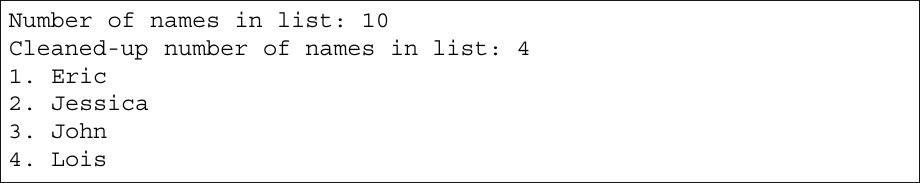

In [29]:

import PIL.Image

image = PIL.Image.open("/content/figures/figure-59-305.jpg")
image

## Summarize Original Text, Tables and Images.

In [30]:
from langchain_openai import ChatOpenAI
from langchain.schema.messages import HumanMessage, AIMessage, SystemMessage

chain_gpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", max_tokens=1024)
#chain_gpt_4o = ChatOpenAI(model="gpt-4o", max_tokens=1024)

# Function for text summaries
def summarize_text(text_element):
    prompt = f"Summarize the following text:\n\ntext:{text_element}\n\nSummary:"
    response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)])
    return response.content

# Function for table summaries
def summarize_table(table_element):
    prompt = f"Summarize the following table:\n\ntable:{table_element}\n\nSummary:"
    response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)])
    return response.content

# Function for image summaries
def summarize_image(encoded_image):
    prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images."),
        HumanMessage(content=[
            {"type": "text", "text": "Describe the contents of this image."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}" # data:[MIME type];base64,[Base64 encoded data]
                },
            },
        ])
    ]
    response = chain_gpt_4o_mini.invoke(prompt)
    return response.content

In [31]:
# Processing table elements with feedback
table_summaries = []
for i, te in enumerate(table_elements):
    summary = summarize_table(te)
    table_summaries.append(summary)
    print(f"{i + 1}th element of tables processed.")

1th element of tables processed.
2th element of tables processed.
3th element of tables processed.
4th element of tables processed.
5th element of tables processed.
6th element of tables processed.
7th element of tables processed.
8th element of tables processed.
9th element of tables processed.
10th element of tables processed.
11th element of tables processed.
12th element of tables processed.
13th element of tables processed.
14th element of tables processed.
15th element of tables processed.
16th element of tables processed.
17th element of tables processed.
18th element of tables processed.
19th element of tables processed.
20th element of tables processed.
21th element of tables processed.
22th element of tables processed.
23th element of tables processed.
24th element of tables processed.
25th element of tables processed.
26th element of tables processed.
27th element of tables processed.
28th element of tables processed.
29th element of tables processed.
30th element of tables 

In [32]:
# Processing text elements with feedback
text_summaries = []
for i, te in enumerate(text_elements):
    summary = summarize_text(te)
    text_summaries.append(summary)
    print(f"{i + 1}th element of texts processed.")

1th element of texts processed.
2th element of texts processed.
3th element of texts processed.
4th element of texts processed.
5th element of texts processed.
6th element of texts processed.
7th element of texts processed.
8th element of texts processed.
9th element of texts processed.
10th element of texts processed.
11th element of texts processed.
12th element of texts processed.
13th element of texts processed.
14th element of texts processed.
15th element of texts processed.
16th element of texts processed.
17th element of texts processed.
18th element of texts processed.
19th element of texts processed.
20th element of texts processed.
21th element of texts processed.
22th element of texts processed.
23th element of texts processed.
24th element of texts processed.
25th element of texts processed.
26th element of texts processed.
27th element of texts processed.
28th element of texts processed.
29th element of texts processed.
30th element of texts processed.
31th element of tex

In [33]:
# Processing image elements with feedback
image_summaries = []
for i, ie in enumerate(image_elements):
    summary = summarize_image(ie)
    image_summaries.append(summary)
    print(f"{i + 1}th element of images processed.")

## Multi-vector retriever


In [34]:
from langchain_openai import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.schema.document import Document
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma

# Initialize the vector store and storage layer
vectorstore = Chroma(#collection_name="summaries",
                     embedding_function=OpenAIEmbeddings(model="text-embedding-3-large",
                                                         dimensions=3072),
                     persist_directory="/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python") # /content/drive/MyDrive/vectorstore
store = InMemoryStore()
id_key = "doc_id"

# Initialize the retriever
retriever = MultiVectorRetriever(vectorstore=vectorstore,
                                 docstore=store,
                                 id_key=id_key)

## Uploading Summary Documents to Vectorstore and Original Documents to Docstore

In [35]:
import uuid #Universally Unique Identifier

def add_documents_to_retriever(summaries, original_contents):
    doc_ids = [str(uuid.uuid4()) for _ in summaries]
    summary_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]})
        for i, s in enumerate(summaries)
    ]

    original_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]})
        for i, s in enumerate(original_contents)
    ]

    # The original data corresponding to each summary was indexed with the same doc_id.
    retriever.vectorstore.add_documents(summary_docs)          # The summaries are sent to vectorstore.
    retriever.docstore.mset(list(zip(doc_ids, original_docs)))

In [38]:
# Add text summaries to vectorstore and the original text corresponding to each summary is sent to docstore
add_documents_to_retriever(text_summaries, text_elements)

# Add table summaries to vectorstore and the original table corresponding to each summary is sent to docstore
add_documents_to_retriever(table_summaries, table_elements)

# Add image summaries to vectorstore and the original image corresponding to each summary is sent to docstore
#add_documents_to_retriever(image_summaries, image_elements)

## Save and Load Docstore and Vectorstore

In [39]:
# get docstore
docstore_store= retriever.docstore
docstore_store

In [40]:
# save the docstore to colab drive/google drive

import pickle

with open('/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python/docstore.pickle', 'wb') as f: #/content/drive/MyDrive/docstore.pickle'
    pickle.dump(docstore_store, f)

In [41]:
# load the docstore from colab drive/google drive

with open('/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python/docstore.pickle', 'rb') as f: #/content/drive/MyDrive/docstore.pickle'
    loaded_docstore = pickle.load(f)
loaded_docstore

In [42]:
loaded_vecstore=Chroma(persist_directory="/content/drive/MyDrive/GENAI-LLM/Projects/Multimodel RAG chatbot with Artificial Intelligence with Python/vectorstore", ## /content/drive/MyDrive/vectorstore
                       embedding_function=OpenAIEmbeddings(model="text-embedding-3-large",
                                                           dimensions=3072))

In [43]:
load_retriever = MultiVectorRetriever(vectorstore=loaded_vecstore,
                                     docstore=loaded_docstore,
                                     id_key="doc_id")

# Retrieval

Get relevant documents for question:

In [ ]:
#retriever.search_kwargs["k"]=5

# By default, MultiVectorRetriever returns the 4 most relevant/similar contents to the query, but you can change this number as above.

In [45]:
query="When Do You Need Regression? explain"

retriever.vectorstore.similarity_search(query)

[Document(metadata={'doc_id': '3cb19bb5-57b0-47e9-ba74-6d6c5c50ba4b'}, page_content='The text outlines key learning outcomes related to regression analysis, including the application of regression models using sklearn and keras, data processing techniques, feature selection, and data cleaning to improve model accuracy, specifically RMSE. It explains the concept of regression, which examines relationships among variables, using examples like employee salaries based on features such as experience and education, or house prices based on various characteristics. The text distinguishes between dependent and independent variables, emphasizing that regression is used to analyze how phenomena influence one another and to forecast outcomes based on new predictors. It also notes that regression does not imply causation and warns against confusing correlation with causation. Lastly, it provides a link to a dataset for practical application.'),
 Document(metadata={'doc_id': '0b0adc52-b3e3-4fa5-86a

In [46]:
doc_search= retriever.invoke(query) #retriever_new
doc_search

# get four most relevant/similar documents

[Document(metadata={'doc_id': '3cb19bb5-57b0-47e9-ba74-6d6c5c50ba4b'}, page_content='Learning outcomes:\n\nLearn and apply basic models for regression tasks using sklearn and keras. • Learn data processing techniques to achieve better results. • Learn how to use simple feature selection techniques to improve our model. • Data cleaning to help improve our model’s RMSE\n\nRegression looks for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.\n\nThis is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, and the salary of the employee depends on them.\n\nSimilarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distan

In [47]:
doc_search[0].page_content

'Learning outcomes:\n\nLearn and apply basic models for regression tasks using sklearn and keras. • Learn data processing techniques to achieve better results. • Learn how to use simple feature selection techniques to improve our model. • Data cleaning to help improve our model’s RMSE\n\nRegression looks for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on the features, such as experience, level of education, role, city they work in, and so on.\n\nThis is a regression problem where data related to each employee represent one observation. The presumption is that the experience, education, role, and city are the independent features, and the salary of the employee depends on them.\n\nSimilarly, you can try to establish a mathematical dependence of the prices of houses on their areas, numbers of bedrooms, distances to the city center, and so on. Generally, in regression analysis, you usually co

In [48]:
query="What is CNN and How to use? explain"

doc_search= retriever.invoke(query) #retriever_new
doc_search[0].page_content

'Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetuning a Convolutional Neural Network\n\npreviously trained on a separate task.\n\n• Expo

## Separating The Elements Returned by Multivector Retriver Into Text and Images

In [49]:
# We parse the first four contents that are most similar to the question/query we asked above as base64 image and text data.
# because we need to give text and image data to the model separately.
from base64 import b64decode, b64encode
def split_image_text_types(docs):

    ''' Split base64-encoded images and texts '''
    b64 = []  # an empty list to hold base64 encoded images
    text = [] # An empty list to hold tables with plain text
    for doc in docs:
        try:
            b64decode(doc.page_content, validate=True)   # Try to parse the string expression in Base64 form as binary data
            b64.append(doc.page_content)  # If successful, add to list 'b64' (It will be successful if the document is in base64 format)
        except Exception as e:            # # If it fails/returns error, an exception is thrown (If the document is in text format, an error will occur)
            text.append(doc.page_content) # Treat it as text and add it to the 'text' list
    return {
        "images": b64,                    # Returns output as a dict
        "texts": text
    }
docs_by_type = split_image_text_types(doc_search)

In [50]:
docs_by_type["texts"]

['Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetuning a Convolutional Neural Network\n\npreviously trained on a separate task.\n\n• Exp

## Visualizing Images Returned by Multivector Retriver

In [51]:
# With this function, we first convert the string expression in base64 form to image and then check its resolution.

from IPython.display import display, HTML
from PIL import Image
import io

def plt_img_base64(img_base64):
    image = Image.open(io.BytesIO(b64decode(img_base64))) # It first analyzes the Base64 string, which is the input parameter,
                                                          # as binary data and then converts this binary data into image data in bytes.

    width, height=image.size
    print(f"image shape: ({width}, {height})") #get image shape

    # Display the image
    return image

plt_img_base64(docs_by_type["images"][0])

## Resizing Images Returned by Multivector Retriver

In [52]:
def resize_base64_image(base64_string, size=(128,128)):
  """
  Resize an image encoded as a Base64 string
  """
  from base64 import b64encode
  # Decode the base64 string
  img_data = b64decode(base64_string)
  img = Image.open(io.BytesIO(img_data))

  # Resize the image
  resized_img = img.resize(size, Image.LANCZOS) # The image is edited to the desired size.
                                                # Image.LANCZOS is the resizing algorithm. Generally provides high quality.

  # Save the resized image to a bytes buffer
  buffered = io.BytesIO() # we create temporary memory.
  resized_img.save(buffered, format=img.format) #We save the resized image into temporary memory.

  # Encode the resized image to Base64
  return b64encode(buffered.getvalue()).decode("utf-8") # We convert the new size image we saved into temporary memory back to base64.

In [55]:
docs_by_type["images"]

In [54]:
docs_by_type["images"]=[resize_base64_image(i, size=(256,256)) for i in docs_by_type["images"]]

In [55]:
plt_img_base64(docs_by_type["images"][0])

## Retrieval Answer for Questions From Models



In [56]:
# The function below returns an answer by taking all these contents into consideration, depending on whether the contents most similar to
# the question we ask are text/table or image.
def prompt_func(dict, question):
    format_texts = "\n".join(dict["texts"])

    messages = [
        {"type": "text", "text": f"""Answer the question based only on the following context, which can include text, tables and the below image(s) if available:
    Question: {question}

    Text and tables:
    {format_texts}

    """}
    ]

    # Iterate through the images
    for image_data in dict['images']:
        messages.append(
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        )

    return HumanMessage(content=messages)

In [57]:
query

'What is CNN and How to use? explain'

In [58]:
docs_by_type

{'images': [],
 'texts': ['Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetuning a Convolutional Neural Network\n\npreviously trained on 

In [59]:
input= prompt_func(docs_by_type, query)
input

HumanMessage(content=[{'type': 'text', 'text': 'Answer the question based only on the following context, which can include text, tables and the below image(s) if available:\n    Question: What is CNN and How to use? explain\n\n    Text and tables:\n    Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • 

In [60]:
model = ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0) # vision models can work on both text and images

output=model.invoke([input])
output

AIMessage(content="**What is CNN and How to use?**\n\n**Convolutional Neural Networks (CNNs)** are a type of neural network specifically designed for processing structured grid data, such as images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from images and perform tasks like image classification, object detection, and semantic segmentation.\n\n### Key Components of CNNs:\n1. **Convolutional Layers**: These layers apply filters to the input image to create feature maps. The filters slide over the image, detecting patterns such as edges, textures, and shapes.\n\n2. **Pooling Layers**: Pooling reduces the spatial dimensions of the feature maps, which helps decrease the computational load and extract dominant features. Max pooling is a common technique that selects the maximum value from a set of values in the feature map.\n\n3. **Flattening**: After the convolutional and pooling laye

In [61]:
to_markdown(output.content)

> **What is CNN and How to use?**
> 
> **Convolutional Neural Networks (CNNs)** are a type of neural network specifically designed for processing structured grid data, such as images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from images and perform tasks like image classification, object detection, and semantic segmentation.
> 
> ### Key Components of CNNs:
> 1. **Convolutional Layers**: These layers apply filters to the input image to create feature maps. The filters slide over the image, detecting patterns such as edges, textures, and shapes.
> 
> 2. **Pooling Layers**: Pooling reduces the spatial dimensions of the feature maps, which helps decrease the computational load and extract dominant features. Max pooling is a common technique that selects the maximum value from a set of values in the feature map.
> 
> 3. **Flattening**: After the convolutional and pooling layers, the multi-dimensional output is flattened into a one-dimensional vector to be fed into fully connected layers.
> 
> 4. **Fully Connected Layers**: These layers learn non-linear combinations of the features extracted by the convolutional layers and are typically used at the end of the network for classification tasks.
> 
> ### How to Use CNNs:
> 1. **Dataset Preparation**: Obtain a dataset suitable for the task (e.g., images for classification). For example, the Fruits 360 dataset can be used for fruit classification tasks.
> 
> 2. **Model Building**: Use libraries like TensorFlow or Keras to build a CNN model. This involves defining the architecture with convolutional layers, pooling layers, and fully connected layers.
> 
> 3. **Training the Model**: Train the model using the training dataset. This involves feeding the images through the network, calculating the loss, and updating the weights using backpropagation.
> 
> 4. **Evaluation**: After training, evaluate the model's performance on a separate test dataset to check its accuracy and loss.
> 
> 5. **Fine-tuning**: If necessary, fine-tune the model by adjusting hyperparameters or using transfer learning, where a pre-trained model is adapted for a new task.
> 
> ### Example Code Snippet:
> Here’s a simplified example of how to build and train a CNN using Keras:
> 
> ```python
> import numpy as np
> import pandas as pd
> from tensorflow.keras.models import Sequential
> from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
> from tensorflow.keras.preprocessing.image import ImageDataGenerator
> 
> # Define the model
> model = Sequential()
> model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
> model.add(MaxPooling2D(pool_size=(2, 2)))
> model.add(Flatten())
> model.add(Dense(128, activation='relu'))
> model.add(Dense(num_classes, activation='softmax'))
> 
> # Compile the model
> model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
> 
> # Train the model
> model.fit(train_data, epochs=10)
> 
> # Evaluate the model
> score = model.evaluate(test_data)
> print(score)
> ```
> 
> This example demonstrates the basic structure of a CNN and how to train it on image data. CNNs are powerful tools for image-related tasks and can be adapted for various applications beyond simple classification.

### Checking whether documents are related to the question

In [62]:
retriever.search_kwargs["k"]=5

In [64]:
query="What is CNN and How to use? explain"

index= retriever.vectorstore.similarity_search(query, k=5)
index

[Document(metadata={'doc_id': '29a90db4-28ca-45e4-8fbb-d007eabd41e0'}, page_content='Chapter 16 focuses on Convolutional Neural Networks (CNNs), which are specialized neural networks that utilize convolution layers to process images similarly to traditional image processing filters. CNNs are widely used for tasks like image classification, object detection, and semantic segmentation, with prominent architectures including ResNet, GoogleNet, and VGG. These networks are typically trained on large datasets and can be adapted for other tasks through fine-tuning in frameworks like Keras and TensorFlow.\n\nKey learning outcomes include understanding convolution, pooling, and flattening operations, performing image classification with CNNs, familiarizing oneself with notable architectures, and grasping concepts like transfer learning and fine-tuning. The chapter contrasts CNNs with fully connected neural networks, highlighting the inefficiency of the latter for image data due to the vast numb

In [65]:
doc_search= retriever.invoke(query) #retriever_new
doc_search

# get four most relevant/similar documents

[Document(metadata={'doc_id': '29a90db4-28ca-45e4-8fbb-d007eabd41e0'}, page_content='Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetunin

In [66]:
from langchain_core.output_parsers import StrOutputParser
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI

def retrival_grader_and_get_relevant_retrival(query, retriever=retriever, k=7):


    class GradeDocuments(BaseModel):
        """Binary score for relevance check on retrieved documents."""

        binary_score: str = Field(
            description="Documents are relevant to the question, 'yes' or 'no'",
            enum=["yes", "no"]
        )

    # Prompt
    system = """You are a grader assessing relevance of a retrieved document to a user question. \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.

        yes: relevant
        no: no relevant"""

    grade_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
        ]
    )

    # LLM with function call
    llm = ChatOpenAI(model="gpt-4o-mini",
                    temperature=0,
                    top_p=1.0)


    retrieval_grader = grade_prompt | llm.with_structured_output(GradeDocuments)

    retriever.search_kwargs["k"]=k

    matching_results=retriever.vectorstore.similarity_search(query, k=k)

    doc_search=retriever.invoke(query)

    new_docs=[]
    binary_score_list=[]

    for doc in matching_results:
      doc_txt=doc.page_content
      binary_score=retrieval_grader.invoke({"question": query, "document": doc_txt})

      binary_score_list.append(binary_score.binary_score)
      if binary_score.binary_score=="yes":
        new_docs.append(doc)
      else:
        continue
    return new_docs, binary_score_list, doc_search

In [67]:
query = "What is CNN and How to use? explain"
new_docs, binary_score_list, doc_search=retrival_grader_and_get_relevant_retrival(query)
display(binary_score_list)

['yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes']

In [68]:
for i in new_docs:
  print(i.metadata["doc_id"])

29a90db4-28ca-45e4-8fbb-d007eabd41e0
6973319e-0bea-49f8-a859-bf939ea89375
87821439-f0d2-450c-9fdf-f271e854e87f
cfcaaf5f-2228-4851-b541-41b160073659
2d149c3f-c403-45ca-8d74-ddd6c5e9b4b2
84055c64-b57e-4797-a8de-69249860a30f


In [69]:
new_doc_search=[]
for i in new_docs:
  for j in doc_search:
    if i.metadata["doc_id"]==j.metadata["doc_id"]:
      new_doc_search.append(j)

In [ ]:
#[j for i in new_docs for j in doc_search if i.metadata["doc_id"]==j.metadata["doc_id"]]

In [70]:
for i in new_doc_search:
  print(i.metadata["doc_id"])

29a90db4-28ca-45e4-8fbb-d007eabd41e0
6973319e-0bea-49f8-a859-bf939ea89375
87821439-f0d2-450c-9fdf-f271e854e87f
cfcaaf5f-2228-4851-b541-41b160073659
2d149c3f-c403-45ca-8d74-ddd6c5e9b4b2
84055c64-b57e-4797-a8de-69249860a30f


In [71]:
new_doc_search

[Document(metadata={'doc_id': '29a90db4-28ca-45e4-8fbb-d007eabd41e0'}, page_content='Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetunin

## Generating an Answer Based on Similar Embeddings Vectors

In [72]:
query

'What is CNN and How to use? explain'

In [73]:
docs_by_type = split_image_text_types(new_doc_search)
docs_by_type

{'images': [],
 'texts': ['Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • Familiarize with notable Convolution Neural Network Architectures. • Understand Transfer Learning and Finetuning. • Perform an image classiﬁcation task through ﬁnetuning a Convolutional Neural Network\n\npreviously trained on 

In [74]:
input= prompt_func(docs_by_type, query)
input

HumanMessage(content=[{'type': 'text', 'text': 'Answer the question based only on the following context, which can include text, tables and the below image(s) if available:\n    Question: What is CNN and How to use? explain\n\n    Text and tables:\n    Chapter 16 Convolutional Neural Networks\n\n® a\n\nAbstract Convolutional Neural Networks are neural networks with convolution layers which perform operations similar to image processing ﬁlters. Convolutional Neural Networks are applied in a variety of tasks related to images such as image classiﬁcation, object detection, and semantic segmentation. Popular Network architectures include ResNet, GoogleNet, and VGG. These networks are often trained on very large datasets, can be downloaded in Keras and Tensorﬂow, and can be later used for ﬁnetuning on other tasks.\n\nLearning outcomes:\n\nUnderstand how convolution, pooling, and ﬂattening operations are performed. • Perform an image classiﬁcation task using Convolutional Neural Networks. • 

In [75]:
model = ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0) # vision models can work on both text and images

output=model.invoke([input])
output.content

"**What is CNN and How to use it?**\n\n**Convolutional Neural Networks (CNNs)** are a type of neural network specifically designed for processing structured grid data, such as images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from input images and perform tasks like image classification, object detection, and semantic segmentation.\n\n### Key Components of CNNs:\n1. **Convolutional Layers**: These layers apply convolution operations using filters (kernels) to the input image, allowing the network to learn spatial hierarchies of features. Each filter detects specific patterns, such as edges or textures.\n\n2. **Pooling Layers**: Pooling layers reduce the spatial dimensions of the feature maps, which helps decrease the computational load and control overfitting. Max pooling is a common technique that selects the maximum value from a set of values in the feature map.\n\n3. **Flatteni

In [76]:
to_markdown(output.content)

> **What is CNN and How to use it?**
> 
> **Convolutional Neural Networks (CNNs)** are a type of neural network specifically designed for processing structured grid data, such as images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from input images and perform tasks like image classification, object detection, and semantic segmentation.
> 
> ### Key Components of CNNs:
> 1. **Convolutional Layers**: These layers apply convolution operations using filters (kernels) to the input image, allowing the network to learn spatial hierarchies of features. Each filter detects specific patterns, such as edges or textures.
> 
> 2. **Pooling Layers**: Pooling layers reduce the spatial dimensions of the feature maps, which helps decrease the computational load and control overfitting. Max pooling is a common technique that selects the maximum value from a set of values in the feature map.
> 
> 3. **Flattening**: After the convolutional and pooling layers, the multi-dimensional output is flattened into a one-dimensional vector to be fed into fully connected layers.
> 
> 4. **Fully Connected Layers**: These layers connect every neuron from the previous layer to every neuron in the current layer, allowing the network to learn complex combinations of features.
> 
> ### How to Use CNNs:
> 1. **Data Preparation**: Gather and preprocess your dataset. For example, you can use the Fruits 360 dataset for fruit classification tasks. Load images and split them into training and testing sets.
> 
> 2. **Model Building**: Use a deep learning framework like TensorFlow or Keras to build your CNN model. Here’s a simple example of how to define a CNN model in Keras:
> 
>    ```python
>    from tensorflow.keras.models import Sequential
>    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
> 
>    model = Sequential()
>    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(100, 100, 3)))
>    model.add(MaxPooling2D(pool_size=(2, 2)))
>    model.add(Dropout(0.05))
>    model.add(Conv2D(32, (5, 5), activation='relu'))
>    model.add(MaxPooling2D(pool_size=(2, 2)))
>    model.add(Dropout(0.05))
>    model.add(Flatten())
>    model.add(Dense(256, activation='relu'))
>    model.add(Dense(num_classes, activation='softmax'))
>    ```
> 
> 3. **Compile the Model**: Choose a loss function and optimizer, and compile the model.
> 
>    ```python
>    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
>    ```
> 
> 4. **Train the Model**: Fit the model to your training data.
> 
>    ```python
>    model.fit(train_data, epochs=2, batch_size=10)
>    ```
> 
> 5. **Evaluate the Model**: After training, evaluate the model's performance on the test dataset.
> 
>    ```python
>    score = model.evaluate(test_data)
>    print(score)
>    ```
> 
> 6. **Fine-tuning and Transfer Learning**: You can also use pre-trained models (like VGG, ResNet) and fine-tune them for your specific tasks, which can save time and improve performance.
> 
> By following these steps, you can effectively use CNNs for various image-related tasks.

### Checking whether answer of model is related to the new_doc_search (retrival documents)

In [77]:
def hallucination_grader(documents, generation):
    ### Hallucination Grader

    # Data model
    class GradeHallucinations(BaseModel):
        """Binary score for hallucination present in generation answer."""

        binary_score: str = Field(
            description="Answer is grounded in the facts, 'yes' or 'no'",
            enum=["yes", "no"]
        )

    # Prompt
    system = """You are a grader assessing whether an LLM generation is grounded in a set of retrieved facts. \n
        Give a binary score 'yes' or 'no'.

        'no' means that the answer is grounded in the set of facts.

        'yes' means that the answer is not grounded in the set of facts."""

    hallucination_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
        ]
    )

    # LLM with function call
    llm = ChatOpenAI(model="gpt-4o-mini",
                    temperature=0,
                    top_p=1.0)

    combined_docs="\n".join([d.page_content for d in documents])


    hallucination_grader = hallucination_prompt | llm.with_structured_output(GradeHallucinations)
    hal_gr=hallucination_grader.invoke({"documents": combined_docs, "generation": generation})
    return hal_gr



In [78]:
hallucination_grader(new_docs, output.content)

GradeHallucinations(binary_score='no')

### Checking whether answer of model is related to the question

In [79]:
def answer_grader(query, generation):

    ### Answer Grader

    # Data model
    class GradeAnswer(BaseModel):
        """Binary score to assess answer addresses question."""

        binary_score: str = Field(
            description="Answer addresses the question, 'yes' or 'no'",
            enum=["yes", "no"]
        )


    # Prompt
    system = """You are a grader assessing whether an answer addresses / resolves a question \n
        Give a binary score 'yes' or 'no'.
        yes means that the answer resolves the question.
        no means that the answer does not resolves the question. """

    answer_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
        ]
    )

    # LLM with function call
    llm = ChatOpenAI(model="gpt-4o-mini",
                    temperature=0,
                    top_p=1.0)

    answer_grader = answer_prompt | llm.with_structured_output(GradeAnswer)
    answer_gr=answer_grader.invoke({"question": query , "generation": generation})
    return answer_gr

In [80]:
query

'What is CNN and How to use? explain'

In [81]:
answer_grader(query, output.content)

GradeAnswer(binary_score='yes')

#### Rewrite Query (if the answer of model isn't related to the question)

In [82]:
def rewrite_query(query):

    ### Question Re-writer
    from langchain_core.output_parsers import StrOutputParser

    # LLM
    llm = ChatOpenAI(model="gpt-4o",
                    temperature=0,
                    top_p=1.0)

    # Prompt
    system = """You a question re-writer that converts an input question to a better version that is optimized \
        for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
    re_write_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            (
                "human",
                "Here is the initial question: \n\n {question} \n Formulate an improved question.",
            ),
        ]
    )

    question_rewriter = re_write_prompt | llm | StrOutputParser()
    return question_rewriter.invoke({"question": query})

In [83]:
query="What is CNN and How to use? explain"
rewrite_query(query)

'What is a Convolutional Neural Network (CNN) and how can it be utilized effectively?'

In [84]:
def rag_chatbot(query, model_name="gpt-4o-mini", k=7):
  """Search for information about transformers and attention. For any questions about transformers and attention.
    For any question about article of 'Attention Is All You Need', you must use this tool!"""
  from langchain_openai import ChatOpenAI

  print("RAG_CHATBOT")
  new_docs, _, doc_search =retrival_grader_and_get_relevant_retrival(query, k=k)
  new_doc_search= [j for i in new_docs for j in doc_search if i.metadata["doc_id"]==j.metadata["doc_id"]]

  docs_by_type = split_image_text_types(new_doc_search) # text ve image olarak ayrıştırılıyor
  input= prompt_func(docs_by_type, query)

  llm=ChatOpenAI(model_name="gpt-4o-mini",
                temperature=0,
                top_p=1)

  output=llm.invoke([input])

  hallucination_gr=hallucination_grader(new_docs, output.content) #özetler üzerinden halisinasyon kontrolü yapılıyor.
  a=0
  while hallucination_gr.binary_score == "yes":
    print("hallucination detected")
    output=llm.invoke([input])
    hallucination_gr=hallucination_grader(new_docs, output.content)
    if a==3:
      print("hallucination problem could not be resolved")
      break
    a+=1

  answer_gr=answer_grader(query, output.content)
  b=0
  while answer_gr.binary_score == "no":
    print("query is being rebuilt")
    rewritten_query = rewrite_query(query)
    new_docs, _, doc_search= retrival_grader_and_get_relevant_retrival(rewritten_query, k=k)
    new_doc_search= [j for i in new_docs for j in doc_search if i.metadata["doc_id"]==j.metadata["doc_id"]]

    docs_by_type = split_image_text_types(new_doc_search) # text ve image olarak ayrıştırılıyor
    input= prompt_func(docs_by_type, rewritten_query)
    output=llm.invoke([input])

    if b==3:
      print("answer problem could not be resolved")
      break
    b+=1

    hallucination_gr=hallucination_grader(new_docs, output.content)
    c=0
    while hallucination_gr.binary_score == "yes":
      print("hallucination detected")
      output=llm.invoke([input])
      hallucination_gr = hallucination_grader(new_docs, output.content)
      if c==3:
        print("hallucination problem could not be resolved")
        break
      c+=1

    answer_gr=answer_grader(rewritten_query, output.content)
    query = rewritten_query

  return output.content

In [85]:
our_query = "What is CNN and How to use? explain"
rag_chatbot(our_query)

RAG_CHATBOT


"**What is CNN and How to use it?**\n\n**Convolutional Neural Networks (CNNs)** are a class of deep learning models specifically designed for processing structured grid data, such as images. They consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers, which work together to extract features from input images and perform tasks like image classification, object detection, and semantic segmentation.\n\n### Key Components of CNNs:\n\n1. **Convolutional Layers**: These layers apply convolution operations using filters (kernels) to the input image, allowing the network to learn spatial hierarchies of features. Each filter detects specific patterns, such as edges or textures.\n\n2. **Pooling Layers**: Pooling layers reduce the spatial dimensions of the feature maps, which helps decrease the computational load and control overfitting. Max pooling is a common technique that selects the maximum value from a set of values in the feature map.\n\n3. *

## Wkipedia

In [86]:
!pip install -qU wikipedia

  Preparing metadata (setup.py) ... done


In [87]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=1000))

In [88]:
wiki.run("What is RNN models?")

'Page: Recurrent neural network\nSummary: Recurrent neural networks (RNNs) are a class of artificial neural networks for sequential data processing. Unlike feedforward neural networks, which process data in a single pass, RNNs process data across multiple time steps, making them well-adapted for modelling and processing text, speech, and time series.\nThe fundamental building block of an RNN is the recurrent unit. This unit maintains a hidden state, essentially a form of memory, which is updated at each time step based on the current input and the previous hidden state. This feedback loop allows the network to learn from past inputs and incorporate that knowledge into its current processing.\nEarly RNNs suffered from the vanishing gradient problem, limiting their ability to learn long-range dependencies. This was solved by the invention of Long Short-Term Memory (LSTM) networks in 1997, which became the standard architecture for RNN.\nThey have been applied to tasks such as unsegmented

In [89]:
def wiki_search(query):
    """
    Web search based on the re-phrased question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with appended web results
    """
    from langchain.schema import Document
    from langchain_core.output_parsers import StrOutputParser
    from langchain_community.tools import WikipediaQueryRun
    from langchain_community.utilities import WikipediaAPIWrapper

    print("WIKIPEDIA SEARCH")

    wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=3, doc_content_chars_max=1000))


    docs = wiki.invoke(query)
    #wiki_results = "\n".join([d["content"] for d in docs])
    wiki_results = Document(page_content=docs)

    prompt = ChatPromptTemplate.from_template(
    """You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question.
    If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    Question: {question}
    Context: {context}
    Answer:"""
    )

    llm = ChatOpenAI(model="gpt-4o-mini",
                     temperature=0.0,
                     top_p=1.0)

    chain = prompt | llm | StrOutputParser()
    answer = chain.invoke({"context": wiki_results, "question": query})

    return answer

In [90]:
wiki_search("what is RNN models")

WIKIPEDIA SEARCH


'Recurrent neural networks (RNNs) are a type of artificial neural network designed for processing sequential data. They maintain a hidden state that acts as memory, allowing them to learn from past inputs and incorporate that knowledge into current processing. RNNs are particularly useful for tasks involving text, speech, and time series data.'

## Router

In [91]:
def router(query):

    from typing import Literal

    from langchain_core.prompts import ChatPromptTemplate
    from langchain_core.pydantic_v1 import BaseModel, Field
    from langchain_openai import ChatOpenAI


    # Data model
    class RouteQuery(BaseModel):
        """Route a user query to the most relevant datasource."""

        datasource: Literal["vectorstore", "wiki_search", "answer_yourself"] = Field(
            description="Given a user question choose to route it to wiki_search or  vectorstore or  answer_yourself."
        )


    # Prompt
    system = """You are an expert at routing a user question to a answer_yourself or wiki_search or vectorstore.

      - answer_yourself: Use this for questions that a typical large language model (LLM) would be confident in answering. \
      These are generally factual questions about common knowledge topics.
      - vectorstore: Use this for any questions specifically related to transformers and attention mechanisms as described \
      in the "Attention is All You Need" paper. This includes questions about the architecture, components, or functioning of transformers.
      - wiki_search: Use this for all other questions that don't fit into the above categories, especially if they require \
      specialized knowledge or if an LLM might be uncertain about the answer.


    After analyzing the question, make your decision about which of them to use."""

    route_prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system),
            ("human", "{question}"),
        ]
    )

    # LLM with function call
    llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
    question_router = route_prompt | llm.with_structured_output(RouteQuery)
    return question_router.invoke({"question": query})

In [92]:
print(router("What is Llama 3.1 Models?"))
print(router("How to work transformers?"))
print(router("Who is the 5th president of USA?"))

datasource='wiki_search'
datasource='vectorstore'
datasource='answer_yourself'


In [93]:
def final_chat_bot(query):
  from langchain_core.output_parsers import StrOutputParser
  from langchain_openai import ChatOpenAI
  from langchain.prompts import PromptTemplate

  if router(query).datasource=="vectorstore":
    print("vectorstore")
    return rag_chatbot(query)
  elif router(query).datasource=="wiki_search":
    print("wiki_search")
    return wiki_search(query)
  else:
    print("answer_yourself")
    prompt_template_name = PromptTemplate.from_template(
    "Answer the user's {question} in the most accurate way possible."
    )
    llm = ChatOpenAI(model="gpt-4o-mini",
                     temperature=0.0,
                     top_p=1.0)
    chain = prompt_template_name | llm | StrOutputParser()

    return chain.invoke({"question": query})

In [94]:
query="What is self-attention?"
final_chat_bot(query)

vectorstore
RAG_CHATBOT


'Self-attention is a mechanism used in neural networks, particularly in natural language processing, that allows the model to weigh the importance of different words in a sequence when encoding a particular word. It enables the model to consider the relationships and dependencies between all words in a sentence, regardless of their position. This is achieved by computing attention scores that determine how much focus to place on other words when processing a specific word, allowing for a more nuanced understanding of context and meaning. Self-attention is a key component of architectures like the Transformer, which has become foundational in many state-of-the-art models.'

In [95]:
query="Who is the 5th president of America?"
final_chat_bot(query)

answer_yourself


'The 5th president of the United States is James Monroe. He served from 1817 to 1825.'

In [96]:
query="What is Llama 3.1 Models?"
final_chat_bot(query)

wiki_search
WIKIPEDIA SEARCH


'Llama 3.1 is the latest version of the Llama family of autoregressive large language models released by Meta AI in July 2024. These models are trained at various parameter sizes, ranging from 7 billion to 405 billion parameters, and are available under licenses that allow some commercial use. Llama models have evolved from being solely foundation models to also include instruction fine-tuned versions.'

In [97]:
query="What is the difference between CNN, deep learning and RNN?"
final_chat_bot(query)

wiki_search
WIKIPEDIA SEARCH


'CNN (Convolutional Neural Network) and RNN (Recurrent Neural Network) are both types of deep learning architectures, which is a subset of machine learning that uses neural networks with multiple layers. CNNs are primarily used for processing grid-like data such as images, while RNNs are designed for sequential data like time series or natural language. In summary, deep learning encompasses both CNNs and RNNs, which serve different purposes in data processing.'

##  CONCLUSION

This project sets out to create a sophisticated Multimodal Agentic RAG (Retrieval-Augmented Generation) chatbot designed to leverage content from the book "Artificial Intelligence with Python" for accurate and contextually relevant question-and-answer interactions. By integrating a robust retriever and model alignment process, the chatbot ensures that responses are grounded in the book's content, maintaining high fidelity to the source material. The layered approach to answer generation—comprising retriever and model alignment, answer and content alignment, and question and answer alignment—enhances the reliability and relevance of the chatbot's responses.

Additionally, the integration of a Wikipedia tool allows the chatbot to extend its capability beyond the book's scope, providing comprehensive answers to a broader range of queries. This dual-source approach ensures that the chatbot is not only a specialized tool for the book's content but also a versatile resource for general knowledge, making it a powerful and well-rounded solution for users seeking information.

Overall, this project demonstrates a meticulous approach to building a responsive, accurate, and contextually aware chatbot, capable of navigating and utilizing both specialized and general knowledge sources to meet diverse user needs.